# Learning about spatial data and maps for archaeology (and other things)

### Spatial Thinking and Skills Exercise 1 for Archaeology of Scotland

#### Made by Rachel Opitz, Archaeology, University of Glasgow



Archaeologists regularly work with maps and data about where sites, samples and objects are found. We ask lots of questions that have a spatial component. Which Bronze Age cairns are close to the coast in England? In this excavation, is bone found inside a building or outside in the yard? It's important to learn to work with spatial data and maps in order to succeed in a variety of careers in archaeology and heritage management.

To start working with spatial data and maps, you need to put together your toolkit. You're currently working inside something called a jupyter notebook. It's a place to keep notes, pictures, code and maps together. You can add tools and data into your jupyter notebook and then use them to ask spatial questions and make maps and visualisations that help answer those questions. 

The aim of this exercise is for you to:
* learn to make very simple static maps
* learn to ask simple questions using spatial data. This is sometimes referred to as 'writing queries'.
* start thinking about the importance of spatial relationships and data in archaeology. 

### Let's get started... Hit 'Ctrl'+'Enter' to run the code in any cell in the page.

![The map that came to life](https://c1.staticflickr.com/4/3017/2863068137_055aef279a_b.jpg)

### We'll start by adding some of the tools we will need. They're not quite like these tools...

![They're not quite like these tools...](https://facetsarchaeology.files.wordpress.com/2016/07/dsc01218.jpg?w=664&h=429)

In [1]:
%matplotlib inline
# Matplotlib is your tool for drawing graphs and basic maps. You need this!

import pandas as pd
import requests
import fiona
import geopandas as gpd
import ipywidgets as widgets
import bokeh

# These are what we call prerequisites. They are basic toosl you need to get started.
# Pandas manipulate data. Geo-pandas manipulate geographic data. They're also black and white and like to eat bamboo... 
# You need these to manipulate your data!
# Fiona helps with geographic data.
# Requests are for asking for things. It's good to be able to ask for things.
# ipywidgets supports interactivity.


# Remember to hit Ctrl+Enter to make things happen!

### Now that we have the basic tools loaded up we need some data. This data is from the Linlithgow Carmetlite Monastery Cemetery excavations, and can be downloaded from the ADS.

In [4]:
url = 'https://raw.githubusercontent.com/ropitz/spatialarchaeology/master/data/linlithgow_burials_Features.json'
# This is where I put the data. It's in a format called geojson, used to represent geometry (shapes) and attributes (text).
request = requests.get(url)
# Please get me the data at that web address (url)
b = bytes(request.content)
# I will use the letter 'b' to refer to the data, like a nickname
with fiona.BytesCollection(b) as f:
    crs = f.crs
    linlithgow_burials = gpd.GeoDataFrame.from_features(f, crs=crs)
    print(linlithgow_burials.head())
# I will use the fiona tool to wrap up all the data from 'b', check the coordinate system (crs) listed in the features
# and print out the first few lines of the file so I can check everything looks ok. 
# Don't worry if you don't understand all the details of this part!



     AG       AP                   AT BASE_LIN  CONTEXT  E_DATE  FID  L_DATE  \
0  1325  FEMALE?  YOUNG ADULT (16-25)  ROUNDED      146     146    0    1250   
1  1325  FEMALE?  YOUNG ADULT (16-25)  ROUNDED      146     146    1    1250   
2  1325  FEMALE?  YOUNG ADULT (16-25)  ROUNDED      146     146    2    1250   
3  1325   FEMALE        ADULT (26-45)  ROUNDED      155     155    3    1250   
4  1325   FEMALE        ADULT (26-45)  ROUNDED      155     155    4    1250   

                SX                                           geometry  
0  SUPINE EXTENDED  LINESTRING (4.288592699646074 14.6415580903662...  
1  SUPINE EXTENDED  LINESTRING (4.622274338493149 14.6040410852642...  
2  SUPINE EXTENDED  LINESTRING (4.626685028024895 14.6040410852642...  
3  SUPINE EXTENDED  LINESTRING (5.897802037871884 13.9963997426016...  
4  SUPINE EXTENDED  LINESTRING (6.15776107434484 13.91171027510092...  


### Does that look right? 

You should have geometry information about polylines (the outline of the shape of each burial) of the contexts from Linlithgow and a bunch of descriptions and information about the burials archaeology. Importatly you should be able to spot the column names: Descriptio, objectid, shape_area, shape_leng, SU, definition, finds_note, formation, geometry, interpret. Each column contains a different type of information. Note that SU (stratigraphic unit) = context.

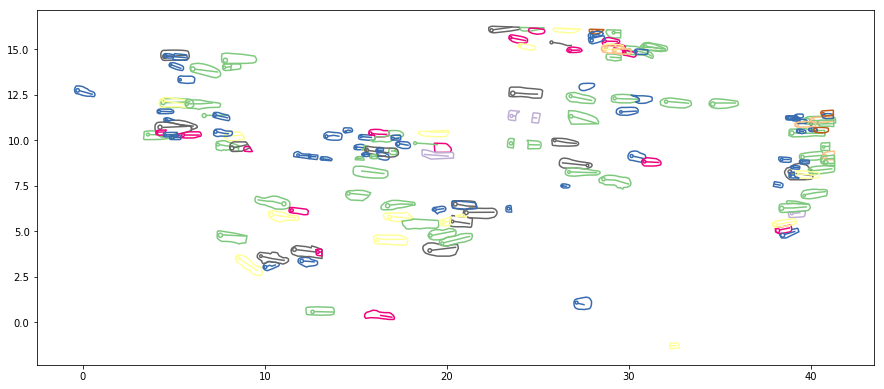

In [7]:
# Let's visualise the data to double check that all is well

linlithgow_map1 = linlithgow_burials.plot(column='AT', cmap='Accent', edgecolor='grey', figsize=(15, 15));
# 'plot' means draw me an image showing the geometry of each feature in my data. 
# We want to control things like the color of different types of burials on our map. 
# I used the pastel colorscale command (cmap stands for 'colour map') 
# and asked it to draw the polygons differently based on the type of burial.


### Well done! You just made your first archaeological map. It shows all the  burials excavated at Carmelite Linlithgow. 

This is good, but what if you only want to look at one kind of burial? We can select specific types of burials from within our dataset by searching (aka querying) for them. 

How do we know what kind of burials we have? Looking at what's inside the data describing all those shapes on the map should help. 

Start by printing out our data in a tidy way. Just type its name...

In [8]:
linlithgow_burials

,AG,AP,AT,BASE_LIN,CONTEXT,E_DATE,FID,L_DATE,SX,geometry
0,1325,FEMALE?,YOUNG ADULT (16-25),ROUNDED,146,146,0,1250,SUPINE EXTENDED,LINESTRING (4.288592699646074 14.6415580903662...
1,1325,FEMALE?,YOUNG ADULT (16-25),ROUNDED,146,146,1,1250,SUPINE EXTENDED,LINESTRING (4.622274338493149 14.6040410852642...
2,1325,FEMALE?,YOUNG ADULT (16-25),ROUNDED,146,146,2,1250,SUPINE EXTENDED,LINESTRING (4.626685028024895 14.6040410852642...
3,1325,FEMALE,ADULT (26-45),ROUNDED,155,155,3,1250,SUPINE EXTENDED,LINESTRING (5.897802037871884 13.9963997426016...
4,1325,FEMALE,ADULT (26-45),ROUNDED,155,155,4,1250,SUPINE EXTENDED,LINESTRING (6.15776107434484 13.91171027510092...
5,1325,FEMALE,ADULT (26-45),ROUNDED,155,155,5,1250,SUPINE EXTENDED,LINESTRING (6.160680110043415 13.9032413132823...
6,1325,FEMALE?,ADULT (26-45),NOT DEFINITIVE,170,170,6,1250,SUPINE EXTENDED,LINESTRING (8.177494239071393 14.1899222181147...
7,1325,FEMALE?,ADULT (26-45),NOT DEFINITIVE,170,170,7,1250,SUPINE EXTENDED,LINESTRING (8.177494239071393 14.1899222181147...
8,1325,FEMALE?,ADULT (26-45),NOT DEFINITIVE,170,170,8,1250,SUPINE EXTENDED,LINESTRING (7.84588398094952 13.99984079044762...
9,1325,FEMALE?,ADULT (26-45),NOT DEFINITIVE,170,170,9,1250,SUPINE EXTENDED,LINESTRING (7.857396709153818 13.9998407904476...


In archaeology we often talk about the dates at which different things happened, and when activities started and ended. Sometimes we are not sure when something happened, so we give a range of dates with an early guess and a late guess. Look at the 'e_date' and 'l_date' columns in the table, and you'll see the date ranges guessed for each burial.

In [10]:
# Say you only want to look at the burials from before 1400, the first ones. Pandas use square brackets [] to make selections. 
# Here we select all the rows (.loc) where the column 'L_DATE' has a value less than 1400. < means 'less than' in code

linlithgow_burials.loc[linlithgow_burials['L_DATE']<1400]

,AG,AP,AT,BASE_LIN,CONTEXT,E_DATE,FID,L_DATE,SX,geometry
0,1325,FEMALE?,YOUNG ADULT (16-25),ROUNDED,146,146,0,1250,SUPINE EXTENDED,LINESTRING (4.288592699646074 14.6415580903662...
1,1325,FEMALE?,YOUNG ADULT (16-25),ROUNDED,146,146,1,1250,SUPINE EXTENDED,LINESTRING (4.622274338493149 14.6040410852642...
2,1325,FEMALE?,YOUNG ADULT (16-25),ROUNDED,146,146,2,1250,SUPINE EXTENDED,LINESTRING (4.626685028024895 14.6040410852642...
3,1325,FEMALE,ADULT (26-45),ROUNDED,155,155,3,1250,SUPINE EXTENDED,LINESTRING (5.897802037871884 13.9963997426016...
4,1325,FEMALE,ADULT (26-45),ROUNDED,155,155,4,1250,SUPINE EXTENDED,LINESTRING (6.15776107434484 13.91171027510092...
5,1325,FEMALE,ADULT (26-45),ROUNDED,155,155,5,1250,SUPINE EXTENDED,LINESTRING (6.160680110043415 13.9032413132823...
6,1325,FEMALE?,ADULT (26-45),NOT DEFINITIVE,170,170,6,1250,SUPINE EXTENDED,LINESTRING (8.177494239071393 14.1899222181147...
7,1325,FEMALE?,ADULT (26-45),NOT DEFINITIVE,170,170,7,1250,SUPINE EXTENDED,LINESTRING (8.177494239071393 14.1899222181147...
8,1325,FEMALE?,ADULT (26-45),NOT DEFINITIVE,170,170,8,1250,SUPINE EXTENDED,LINESTRING (7.84588398094952 13.99984079044762...
9,1325,FEMALE?,ADULT (26-45),NOT DEFINITIVE,170,170,9,1250,SUPINE EXTENDED,LINESTRING (7.857396709153818 13.9998407904476...


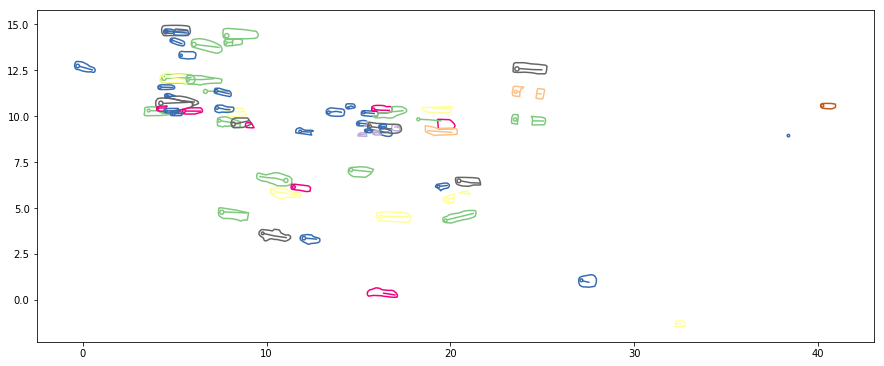

In [13]:
# If we want to see this result as a map, we just add the .plot command to the end.

linlithgow_burials.loc[linlithgow_burials['L_DATE'] <1400].plot(column='AT', cmap='Accent', figsize=(15, 15))

In [19]:
# Try and do the same thing for burials that are earlier than 1500
linlithgow_burials.loc[(linlithgow_burials['L_DATE']<=1500) & (linlithgow_burials['L_DATE'] >= 1400)]

,AG,AP,AT,BASE_LIN,CONTEXT,E_DATE,FID,L_DATE,SX,geometry
49,1500,UNK,IMMATURE (11-15),ROUNDED,201,201,49,1450,SUPINE EXTENDED,LINESTRING (8.427094356244027 3.64020566028270...
50,1500,UNK,IMMATURE (11-15),ROUNDED,201,201,50,1450,SUPINE EXTENDED,LINESTRING (8.615597422779175 3.53458194623698...
51,1500,UNK,IMMATURE (11-15),ROUNDED,201,201,51,1450,SUPINE EXTENDED,LINESTRING (8.614729134757738 3.48564872695959...
52,1500,UNK,INFANT (0-5),ROUNDED,190,190,52,1450,SUPINE EXTENDED,LINESTRING (9.906564946299227 2.97096193650395...
53,1500,UNK,INFANT (0-5),ROUNDED,190,190,53,1450,SUPINE EXTENDED,LINESTRING (10.11256794488787 3.02974364085400...
54,1500,UNK,INFANT (0-5),ROUNDED,190,190,54,1450,SUPINE EXTENDED,LINESTRING (10.12237766679675 3.05913449302903...
61,1625,UNK,YOUNG ADULT (16-25),ROUNDED,177,177,61,1450,SUPINE EXTENDED,LINESTRING (11.43571774306918 3.97138647432606...
62,1625,UNK,YOUNG ADULT (16-25),ROUNDED,177,177,62,1450,SUPINE EXTENDED,LINESTRING (11.72880550763734 3.99280411907966...
63,1625,UNK,YOUNG ADULT (16-25),ROUNDED,177,177,63,1450,SUPINE EXTENDED,LINESTRING (11.72880550763733 3.98566495439021...
65,1625,UNK,JUVENILE (6-10),NOT DEFINITIVE,171,171,65,1450,SUPINE EXTENDED,LINESTRING (13.13526317060911 4.00338146859581...


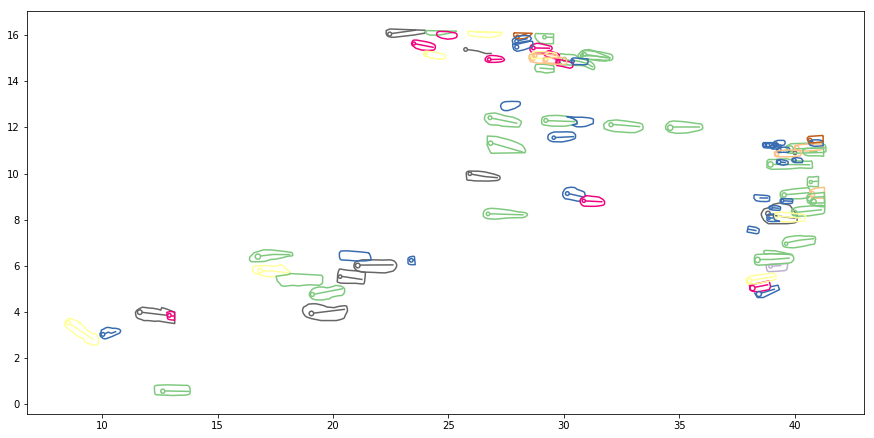

In [21]:
# Remember to draw it as a map!
linlithgow_burials.loc[(linlithgow_burials['L_DATE']<=1500) & (linlithgow_burials['L_DATE'] >= 1400)].plot(column='AT', cmap='Accent', figsize=(15, 15))

In [22]:
# Let's save these selections of 'pre1400' and 'pre1500' so we can use them again.
# I've given them names here. These are now 'named variables'
pre1400 = linlithgow_burials.loc[linlithgow_burials['L_DATE'] <1400]
pre1500 = linlithgow_burials.loc[(linlithgow_burials['L_DATE']<=1500) & (linlithgow_burials['L_DATE'] >= 1400)]

In [23]:
#Test your named variable by printing it out again, calling it by its name.
pre1400

,AG,AP,AT,BASE_LIN,CONTEXT,E_DATE,FID,L_DATE,SX,geometry
0,1325,FEMALE?,YOUNG ADULT (16-25),ROUNDED,146,146,0,1250,SUPINE EXTENDED,LINESTRING (4.288592699646074 14.6415580903662...
1,1325,FEMALE?,YOUNG ADULT (16-25),ROUNDED,146,146,1,1250,SUPINE EXTENDED,LINESTRING (4.622274338493149 14.6040410852642...
2,1325,FEMALE?,YOUNG ADULT (16-25),ROUNDED,146,146,2,1250,SUPINE EXTENDED,LINESTRING (4.626685028024895 14.6040410852642...
3,1325,FEMALE,ADULT (26-45),ROUNDED,155,155,3,1250,SUPINE EXTENDED,LINESTRING (5.897802037871884 13.9963997426016...
4,1325,FEMALE,ADULT (26-45),ROUNDED,155,155,4,1250,SUPINE EXTENDED,LINESTRING (6.15776107434484 13.91171027510092...
5,1325,FEMALE,ADULT (26-45),ROUNDED,155,155,5,1250,SUPINE EXTENDED,LINESTRING (6.160680110043415 13.9032413132823...
6,1325,FEMALE?,ADULT (26-45),NOT DEFINITIVE,170,170,6,1250,SUPINE EXTENDED,LINESTRING (8.177494239071393 14.1899222181147...
7,1325,FEMALE?,ADULT (26-45),NOT DEFINITIVE,170,170,7,1250,SUPINE EXTENDED,LINESTRING (8.177494239071393 14.1899222181147...
8,1325,FEMALE?,ADULT (26-45),NOT DEFINITIVE,170,170,8,1250,SUPINE EXTENDED,LINESTRING (7.84588398094952 13.99984079044762...
9,1325,FEMALE?,ADULT (26-45),NOT DEFINITIVE,170,170,9,1250,SUPINE EXTENDED,LINESTRING (7.857396709153818 13.9998407904476...


So far these searches have been about the attributes of our data. Attributes are information that desribes the shapes. We can also ask questions about spatial relationships or real-world location. First, let's find the bounding box, or real world location and extents of our data. These are the smallest and largest coordinates on the x- and y- axes in the real world. We use the command 'total_bounds' to ask this question. Things 'in bounds' are inside the box.

In [24]:
pre1400.total_bounds

array([-0.44993622, -1.45503866, 40.96710772, 14.94919826])

In [25]:
# Now do the same thing for the pre-1500 burials. The results should be similar, but not identical.
pre1500.total_bounds

array([ 8.38939474,  0.38325071, 41.35853322, 16.26253414])

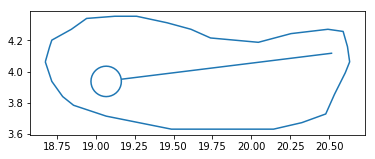

In [32]:
# Now we will select a single burial
pre1500_182 = pre1500.loc[pre1500['CONTEXT'] == 182]
pre1500_182
pre1500_182.plot()

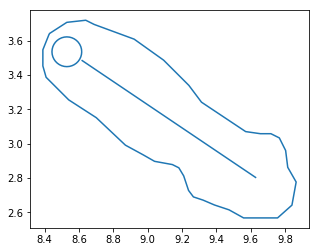

In [34]:
#Now we will select another specific burial.
pre1500_201 = pre1500.loc[pre1500['CONTEXT'] == 201]
pre1500_201
pre1500_201.plot()

### One of these burials is immature (a young person) while one is identified as an older person.
 
Are they different shapes or sizes, or facing different directions?

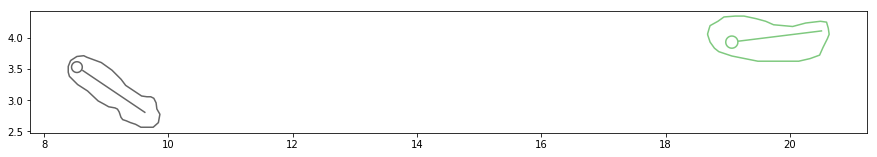

In [42]:
# To do this we have to provide a list of the values we are interested in seeing on the map, in square brackets []
pre1500_both= pre1500.loc[pre1500['CONTEXT'].isin([201,182])]
pre1500_both
pre1500_both.plot(column='CONTEXT', cmap='Accent', figsize=(15, 15))

What does this map suggest? Are there any size, shape or orientation differences in these burials? What might similarities or differences mean?

#### Now we might ask a more complicated question, and look at all the burials that physically intersect with other burials.

### Now try another question. What if we wanted to find all the contexts defined as infant burials? 

Look in the 'AT' column. Infants are defined as 'INFANT (0-5)'. In many archaeological situations infants are buried differently. Perhaps they are in a separate area, or always close to an adult. These are interesting questions to investigate spatially.

In [50]:
linlithgow_infants = linlithgow_burials[linlithgow_burials['AT'].str.contains('INFANT')]
linlithgow_infants

,AG,AP,AT,BASE_LIN,CONTEXT,E_DATE,FID,L_DATE,SX,geometry
10,1325,UNK,INFANT (0-5),NOT DEFINITIVE,154,154,10,1250,SUPINE EXTENDED,LINESTRING (5.411273896737699 13.3172760405377...
12,1325,UNK,INFANT (0-5),ROUNDED,205,205,12,1250,SUPINE EXTENDED,LINESTRING (-0.449936221109283 12.813488463243...
13,1325,UNK,INFANT (0-5),ROUNDED,205,205,13,1250,SUPINE EXTENDED,LINESTRING (-0.1883411613566896 12.73606895520...
14,1325,UNK,INFANT (0-5),ROUNDED,205,205,14,1250,SUPINE EXTENDED,LINESTRING (-0.1872593784698893 12.72117989860...
52,1500,UNK,INFANT (0-5),ROUNDED,190,190,52,1450,SUPINE EXTENDED,LINESTRING (9.906564946299227 2.97096193650395...
53,1500,UNK,INFANT (0-5),ROUNDED,190,190,53,1450,SUPINE EXTENDED,LINESTRING (10.11256794488787 3.02974364085400...
54,1500,UNK,INFANT (0-5),ROUNDED,190,190,54,1450,SUPINE EXTENDED,LINESTRING (10.12237766679675 3.05913449302903...
58,1450,UNK,INFANT (0-5),ROUNDED,198,198,58,1250,SUPINE EXTENDED,LINESTRING (11.82173580278084 3.40024953203928...
59,1450,UNK,INFANT (0-5),ROUNDED,198,198,59,1250,SUPINE EXTENDED,LINESTRING (12.12197200691781 3.36455340722156...
60,1450,UNK,INFANT (0-5),ROUNDED,198,198,60,1250,SUPINE EXTENDED,LINESTRING (12.12912044648664 3.35741424253211...


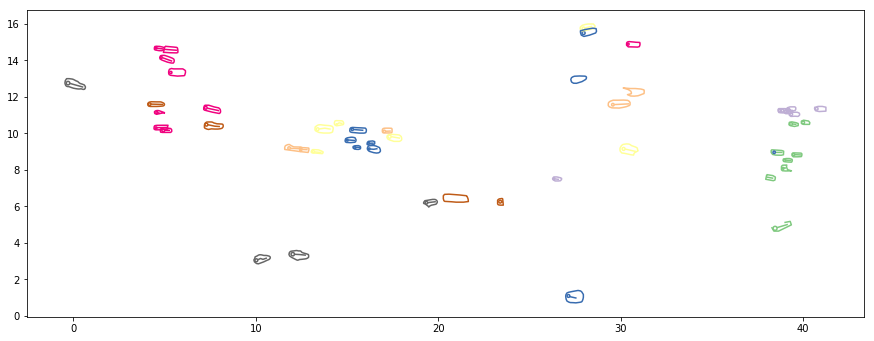

In [51]:
# Now create a map of all the burials of infants.
linlithgow_infants.plot(column='CONTEXT', cmap='Accent', edgecolor='grey', figsize=(15, 15))

### What if we wanted to know about burials that were near infant burials? Let's construct a new query.
How close is close? Let's say 0.5meters.


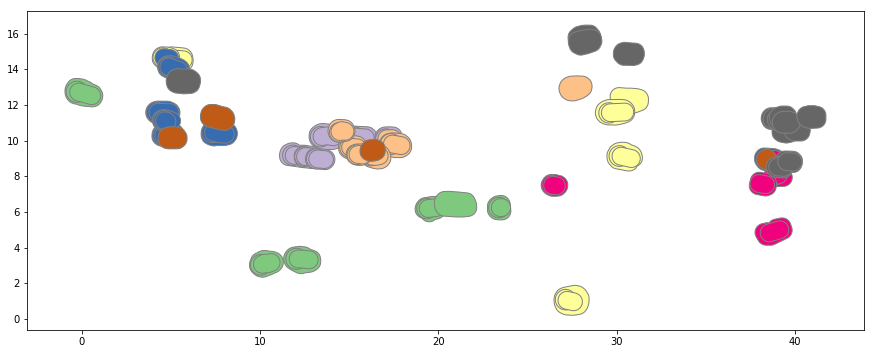

In [55]:
linlithgow_infants_close = linlithgow_infants.buffer(0.5)
linlithgow_infants_close.plot(cmap='Accent', edgecolor='grey', figsize=(15, 15))

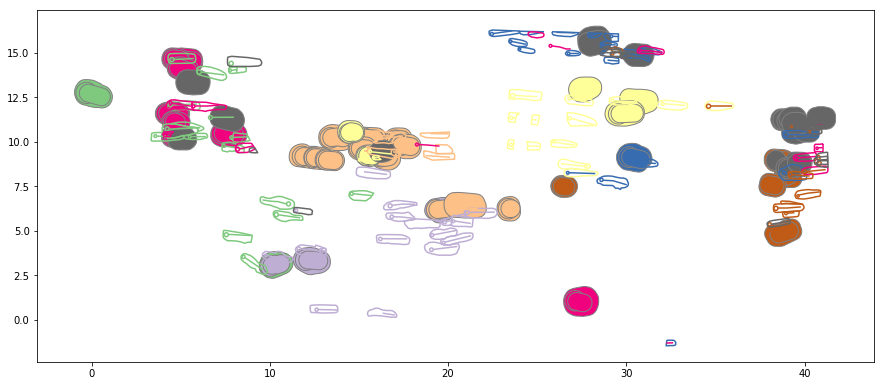

In [57]:
# Now we plot the intersection between the buffered infant burials shapes and all the other burials shapes.
linlithgow_burials.union(linlithgow_infants_close).plot(cmap='Accent', edgecolor='grey', figsize=(15, 15))

### What do we conclude? Are infants buried close to other burials? To adults?

### This ends the tutorial. You can practice writing queries (asking questions of your data) by playing around in this notebook. Try changing values or searching for different types of burials or their dates. You'll be doing this in class during your next practical!

Hopefully you learned to:
* make very simple static maps
* ask simple questions using spatial data. This is sometimes referred to as 'writing queries'.
* start thinking about the importance of spatial relationships and data in archaeology. 
